# 差分プライバシーの探索

差分プラバシーは、個別に識別できるデータ値を保護しながら、有益な分析を可能にする最先端のアプローチ。

データの分析次第では、複数の分析を統合した場合に特定のユーザの情報を識別できる可能性があり、  
これらによる暴露から個人データを保護するのに差分プライバシーが役立つ。

## 差分プライバシーを理解する

差分プライバシーは、分析プロセスに統計的"ノイズ"を追加することによって、個々のデータ地を保護しようとするもの。
ノイズによって、多少のランダムなバリエーションが許容されてデータの集計が実際のデータ地と統計的に一致するものの、特定できないことが保証される。  
また、ノイズは分析毎に異なるため結果は非決定的になることから、同じ集計を実行する2つの分析によって、多少異なる結果が生じる場合がある。

## データプライバシーのパラメータを構成する

個人データを保護する手法の一つに、**単に調査に参加しない**というものがあり、これを**オプトアウト**オプションと呼ばれる。  
これについては、解決策としてはいくつか考慮事項がある。

- 調査によりお客様に影響を及ぼす結果が生じる恐れがある
- この調査に参加する利点が、悪影響を上回る場合がある
    - 例えば100ドル受け取って調査に参加した結果、健康保険料が1年で10ドル増加した場合は純損失が10年以上経過してから発生する  
    この場合、お客様にとって有意義なトレードオフになる可能性がある
- オプトアウトオプションがすべての個人に対して有効となるゆういつの方法は、すべての個人が参加しないことで、そうなると調査そのものが無意味になる

ノイズに追加によって生じるバリエーションの量は、$\epsilon$というパラメータを使用して構成できる。  
オプトアウトオプションをせずに調査に参加することで個人データが特定されるという付加リスクの量が、この値によって制御される。  

重要なのは、この調査に参加するすべての個人に対して、このプライバシー原則が適用されるという点。  

- $\epsilon$が小さい　→ データ集計の精度が低下するが、高度なプライバシーが実現する
- $\epsilon$が大きい　→ データ集計の精度が向上するが、ノイズによる不透明度が小さくなる

> 注 : $\epsilon$で設定した値の逆数をノイズとして入れるので、値が大きくなるほどノイズが小さくなる

## 演習 差分プライバシーの使用

### SmartNoise SDKのインストール

SmartNoiseはOpenDPのツールキットで、データ分析や機械学習プロジェクトにおいて、  
差分プライバシーを使用するためのビルディングブロックを提供することを目的としている。

In [1]:
!pip install opendp-smartnoise==0.1.3.1

### データの読み込み

In [2]:
import pandas as pd

data_path = 'data/diabetes.csv'
diabetes = pd.read_csv(data_path)
diabetes.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.502122e+06,3.25580,107.850200,71.207500,28.81760,139.243600,31.567022,0.400944,30.134100,0.334400
std,2.892868e+05,3.40572,31.920909,16.801478,14.50648,133.777919,9.804366,0.381463,12.106047,0.471804
min,1.000038e+06,0.00000,44.000000,24.000000,7.00000,14.000000,18.200807,0.078044,21.000000,0.000000
25%,1.251672e+06,0.00000,84.000000,58.000000,15.00000,39.000000,21.247427,0.137065,22.000000,0.000000
50%,1.504394e+06,2.00000,105.000000,72.000000,31.00000,85.000000,31.922421,0.199698,24.000000,0.000000
75%,1.754608e+06,6.00000,129.000000,85.000000,41.00000,197.000000,39.328921,0.621158,35.000000,1.000000
max,1.999997e+06,14.00000,192.000000,117.000000,92.00000,796.000000,56.034628,2.301594,77.000000,1.000000


上記のコードの出力は糖尿病データセットの変数の主要な要約統計量を示している。

### 分析の実行

SmartNoiseを使って、データにノイズを加えた分析を行うことができる。  
ノイズの追加方法は非常に複雑だが、SmartNoiseはそのほとんどを代行してくれるが、知っておくと便利な概念がいくつかある。

- **上限と下限(Upper and lower bounds)** :

    - *clamping*は、変数の値に上限と下限を設定するために使用される。  
    これはSmartNoiseによって生成されるノイズが、元のデータの期待される分布と一致するようにするために必要


- **サンプルサイズ(Sample size)** : 

    - 一部のアグリゲーションで一貫した差分プライベートデータを生成するために、  
    SmartNoiseは生成されるデータサンプルのサイズを知る必要がある。


- **$\epsilon$(Epsilon)** : 

    - 非負の値で、データに付加されるノイズの量を逆算したもの。  
    $\epsilon$は、分析によって生成されたレポートが完全には非公開ではない確率を示す $\delta$という別の値と相関がある。


これらの概念を念頭に置いて分析を作成し、差分プライベートデータから平均Age値をレポートする以下のコードを調べて実行する。  
比較のため、基の生データからの実際の平均値も表示される。

> Python 3.8だとエラーになるので注意

In [3]:
import opendp.smartnoise.core as sn

cols = list(diabetes.columns)
age_range = [0.0, 120.0]
samples = len(diabetes)

with sn.Analysis() as analysis:
    # load data
    data = sn.Dataset(path=data_path, column_names=cols)
    
    # Convert Age to float
    age_dt = sn.to_float(data['Age'])
    
    # get mean of age
    age_mean = sn.dp_mean(data = age_dt,
                          privacy_usage = {'epsilon': .50},
                          data_lower = age_range[0],
                          data_upper = age_range[1],
                          data_rows = samples
                         )
    
analysis.release()

# print differentially private estimate of mean age
print("Private mean age:",age_mean.value)

# print actual mean age
print("Actual mean age:",diabetes.Age.mean())

Private mean age: 30.192
Actual mean age: 30.1341


### ヒストグラムでデータの分布を調べる

データを分析する際には、ヒストグラムを使って変数の分布を調べるのが一般的。  
例えば、糖尿病のデータセットにおける年齢の真の分布を見てみる。

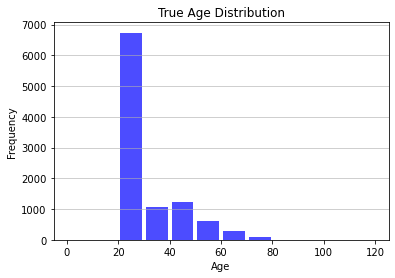

[   0    0 6735 1074 1229  614  273   75    0    0    0    0]


In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ages = list(range(0, 130, 10))
age = diabetes.Age

# Plot a histogram with 10-year bins
n_age, bins, patches = plt.hist(age, bins=ages, color='blue', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('True Age Distribution')
plt.show()
print(n_age.astype(int))

続いて、Ageの差分プライバシーのヒストグラムと比較してみる。

In [10]:
with sn.Analysis() as analysis:
    sn_data = sn.Dataset(path = data_path, column_names = cols)

    age_bp_cov_scalar = sn.dp_covariance(
                left = sn.to_float(sn_data['Age']),
                right = sn.to_float(sn_data['DiastolicBloodPressure']),
                privacy_usage = {'epsilon': 1.0},
                left_lower = 0.,
                left_upper = 120.,
                left_rows = 10000,
                right_lower = 0.,
                right_upper = 150.,
                right_rows = 10000)
analysis.release()
print('Differentially private covariance: {0}'.format(age_bp_cov_scalar.value[0][0]))
print('Actual covariance', diabetes.Age.cov(diabetes.DiastolicBloodPressure))

Differentially private covariance: 3.6
Actual covariance 8.720346284628466


この場合、**Age**と**DisatolicBloodPressure**の共分散は正であり、高齢の患者は血圧が高い傾向にあることを示す。

### SQLクエリの使用

分析機能を加えて、SmartNoiseではデータソースに対してSQLクエリを使用して、差分プライバシー集計結果を取得することができる。

まず、データスキーマにテーブルのメタデータを定義する必要がある。  
これは、**/metadata**フォルダ内の**disease.yml**ファイルのようなymlファイルで行うことができる。  
メタデータには、データタイプや数値フィールドの最小値と最大値など、テーブルのフィールドが記述されている。

In [11]:
from opendp.smartnoise.metadata import CollectionMetadata

meta = CollectionMetadata.from_file('metadata/diabetes.yml')
print (meta)

diabetes.diabetes [10000 rows]
	*PatientID [int] (unbounded)
	Pregnancies [int] (0,20)
	PlasmaGlucose [float] (0.0,200.0)
	DiastolicBloodPressure [float] (0.0,150.0)
	TricepsThickness [float] (0.0,100.0)
	SerumInsulin [float] (0.0,1000.0)
	BMI [float] (0.0,100.0)
	DiabetesPedigree [float] (0.0,3.0)
	Age [int] (0,120)
	Diabetic (boolean)


メタデータが定義されていれば、クエリを実行できるリーダーを作成することができる。  
以下の例では、Pandasのデータフレームから生のデータを読み取る**PandasReader**と、  
PandasReaderに差分プライバシーレイヤーを追加する**PrivateReader**を作成する。

In [12]:
from opendp.smartnoise.sql import PandasReader, PrivateReader

reader = PandasReader(diabetes, meta)
private_reader = PrivateReader(reader, meta)
print('Readers ready.')

Readers ready.


これで集約された結果セットを返すSQLクエリを、PrivateReaderに送信することができる。

In [13]:
query = 'SELECT Diabetic, AVG(Age) AS AvgAge FROM diabetes.diabetes GROUP BY Diabetic'

result_dp = private_reader.execute(query)
print(result_dp)

[['Diabetic', 'AvgAge'], [False, 27.300174925193126], [True, 36.17377264594252]]


その結果を、生データからの同じ集計結果と比較してみる。

In [14]:
result = reader.execute(query)
print(result)

[('Diabetic', 'AvgAge'), (0, 27.073467548076923), (1, 36.22607655502392)]


$\epsilon$を明示的に指定することで、**PrivateReader**の動作をカスタマイズすることができる。  
$\epsilon$の大小でどのように変わるか試してみる。

In [15]:
low_privacy_reader = PrivateReader(reader, meta, 5.0)  # large epsilon, less privacy
result = low_privacy_reader.execute(query)
print(result)
print()

high_privacy_reader = PrivateReader(reader, meta, 0.1)  # smaller epsilon, more privacy
result = high_privacy_reader.execute(query)
print(result)

[['Diabetic', 'AvgAge'], [False, 27.018983862028225], [True, 36.123119847689026]]

[['Diabetic', 'AvgAge'], [False, 27.72814001688977], [True, 40.44500675460525]]


上記のように、結果と比べて生データから得られる真の結果に近いものとなっている。

> SmartNoiseによる差分プライバシーの詳細URL : https://smartnoise.org/

## 知識チェック

1. 差分プライバシーはどのように機能しますか?

    - データセット内のすべての数値は暗号化されており、分析に使用することはできません。
    - 集計がデータ分布と統計的に一致しているが非決定的となるように、分析中にデータにノイズが追加されます。
    - データセット内のすべての数値列の値は、列の平均値に変換されます。 データの分析では、実際値の代わりに平均値が使用されます。

2. 差分プライバシー ソリューションでイプシロン パラメーターを設定した場合、どのような効果が得られますか?

    - イプシロンが小さいほど、個人データが集計結果に与える影響が小さくなるため、プライバシーが向上し、精度が低下します。
    - イプシロンが小さいほど、データに追加されるノイズの量が減少するため、精度が向上し、プライバシーが低下します。
    - イプシロンを 1 に設定すると、差分プライバシーが有効になります。 0 に設定すると、差分プライバシーが無効になります。

↓解答

1. 集計がデータ分布と統計的に一致しているが非決定的となるように、分析中にデータにノイズが追加されます。

    - 差分プライバシー ソリューションでは、集計が統計的に一貫しているが非決定的となるように、  
    分析の生成時にデータにノイズが追加されます。また、集計に対する個人の影響を特定することはできません。

2. イプシロンが小さいほど、個人データが集計結果に与える影響が小さくなるため、プライバシーが向上し、精度が低下します。
    
    - イプシロンが小さいほど、個人データが集計結果に与える影響が小さくなるため、暴露のリスクが低くなります。